In [1]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the numpy, pandas and other required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




-  #### Import and read



In [3]:
# Reading the csv file using 'read_csv' and store it in as a dataframe called `car`.

car = pd.read_csv('CarPrice_Assignment.csv')


- #### Inspect the dataframe


In [4]:
# Checking the number of rows and columns in the dataframe

car.shape


(205, 26)

In [5]:
# Checking the column-wise info of the dataframe

car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Getting summary of the dataframe using 'describe()'

car.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Checking the column names of the dataframe

car.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')



- ####  Inspecting Null values


In [9]:
# Getting the column-wise Null count using 'is.null()' alongwith the 'sum()' function

car.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# Getting the row-wise Null count the same way. This time just specify the axis as 1

car.isnull().sum(axis=1)


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
200    0
201    0
202    0
203    0
204    0
Length: 205, dtype: int64

In [11]:
# Checking for duplicate values

car['car_ID'].nunique()


205

In [12]:
# Getting new column from existing "Car Company" dataframe

new = car.CarName.str.split(" ", n = 1, expand = True)
car["Car Company"]= new[0]
car.drop(columns =["CarName"], inplace = True)


In [13]:
# To check the new column created

print(car.info())
car.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car Company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [14]:
# To check the uniqueness

car["Car Company"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
# To change into lower case

car["Car Company"] = car["Car Company"].astype(str).str.lower()
car["Car Company"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
# To Replace the incorrect names with correct

car["Car Company"] = car["Car Company"].replace({'toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen',
                                                'maxda':'mazda','porsche':'porcshce'})
car["Car Company"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

- #### Visualising Numeric Variables



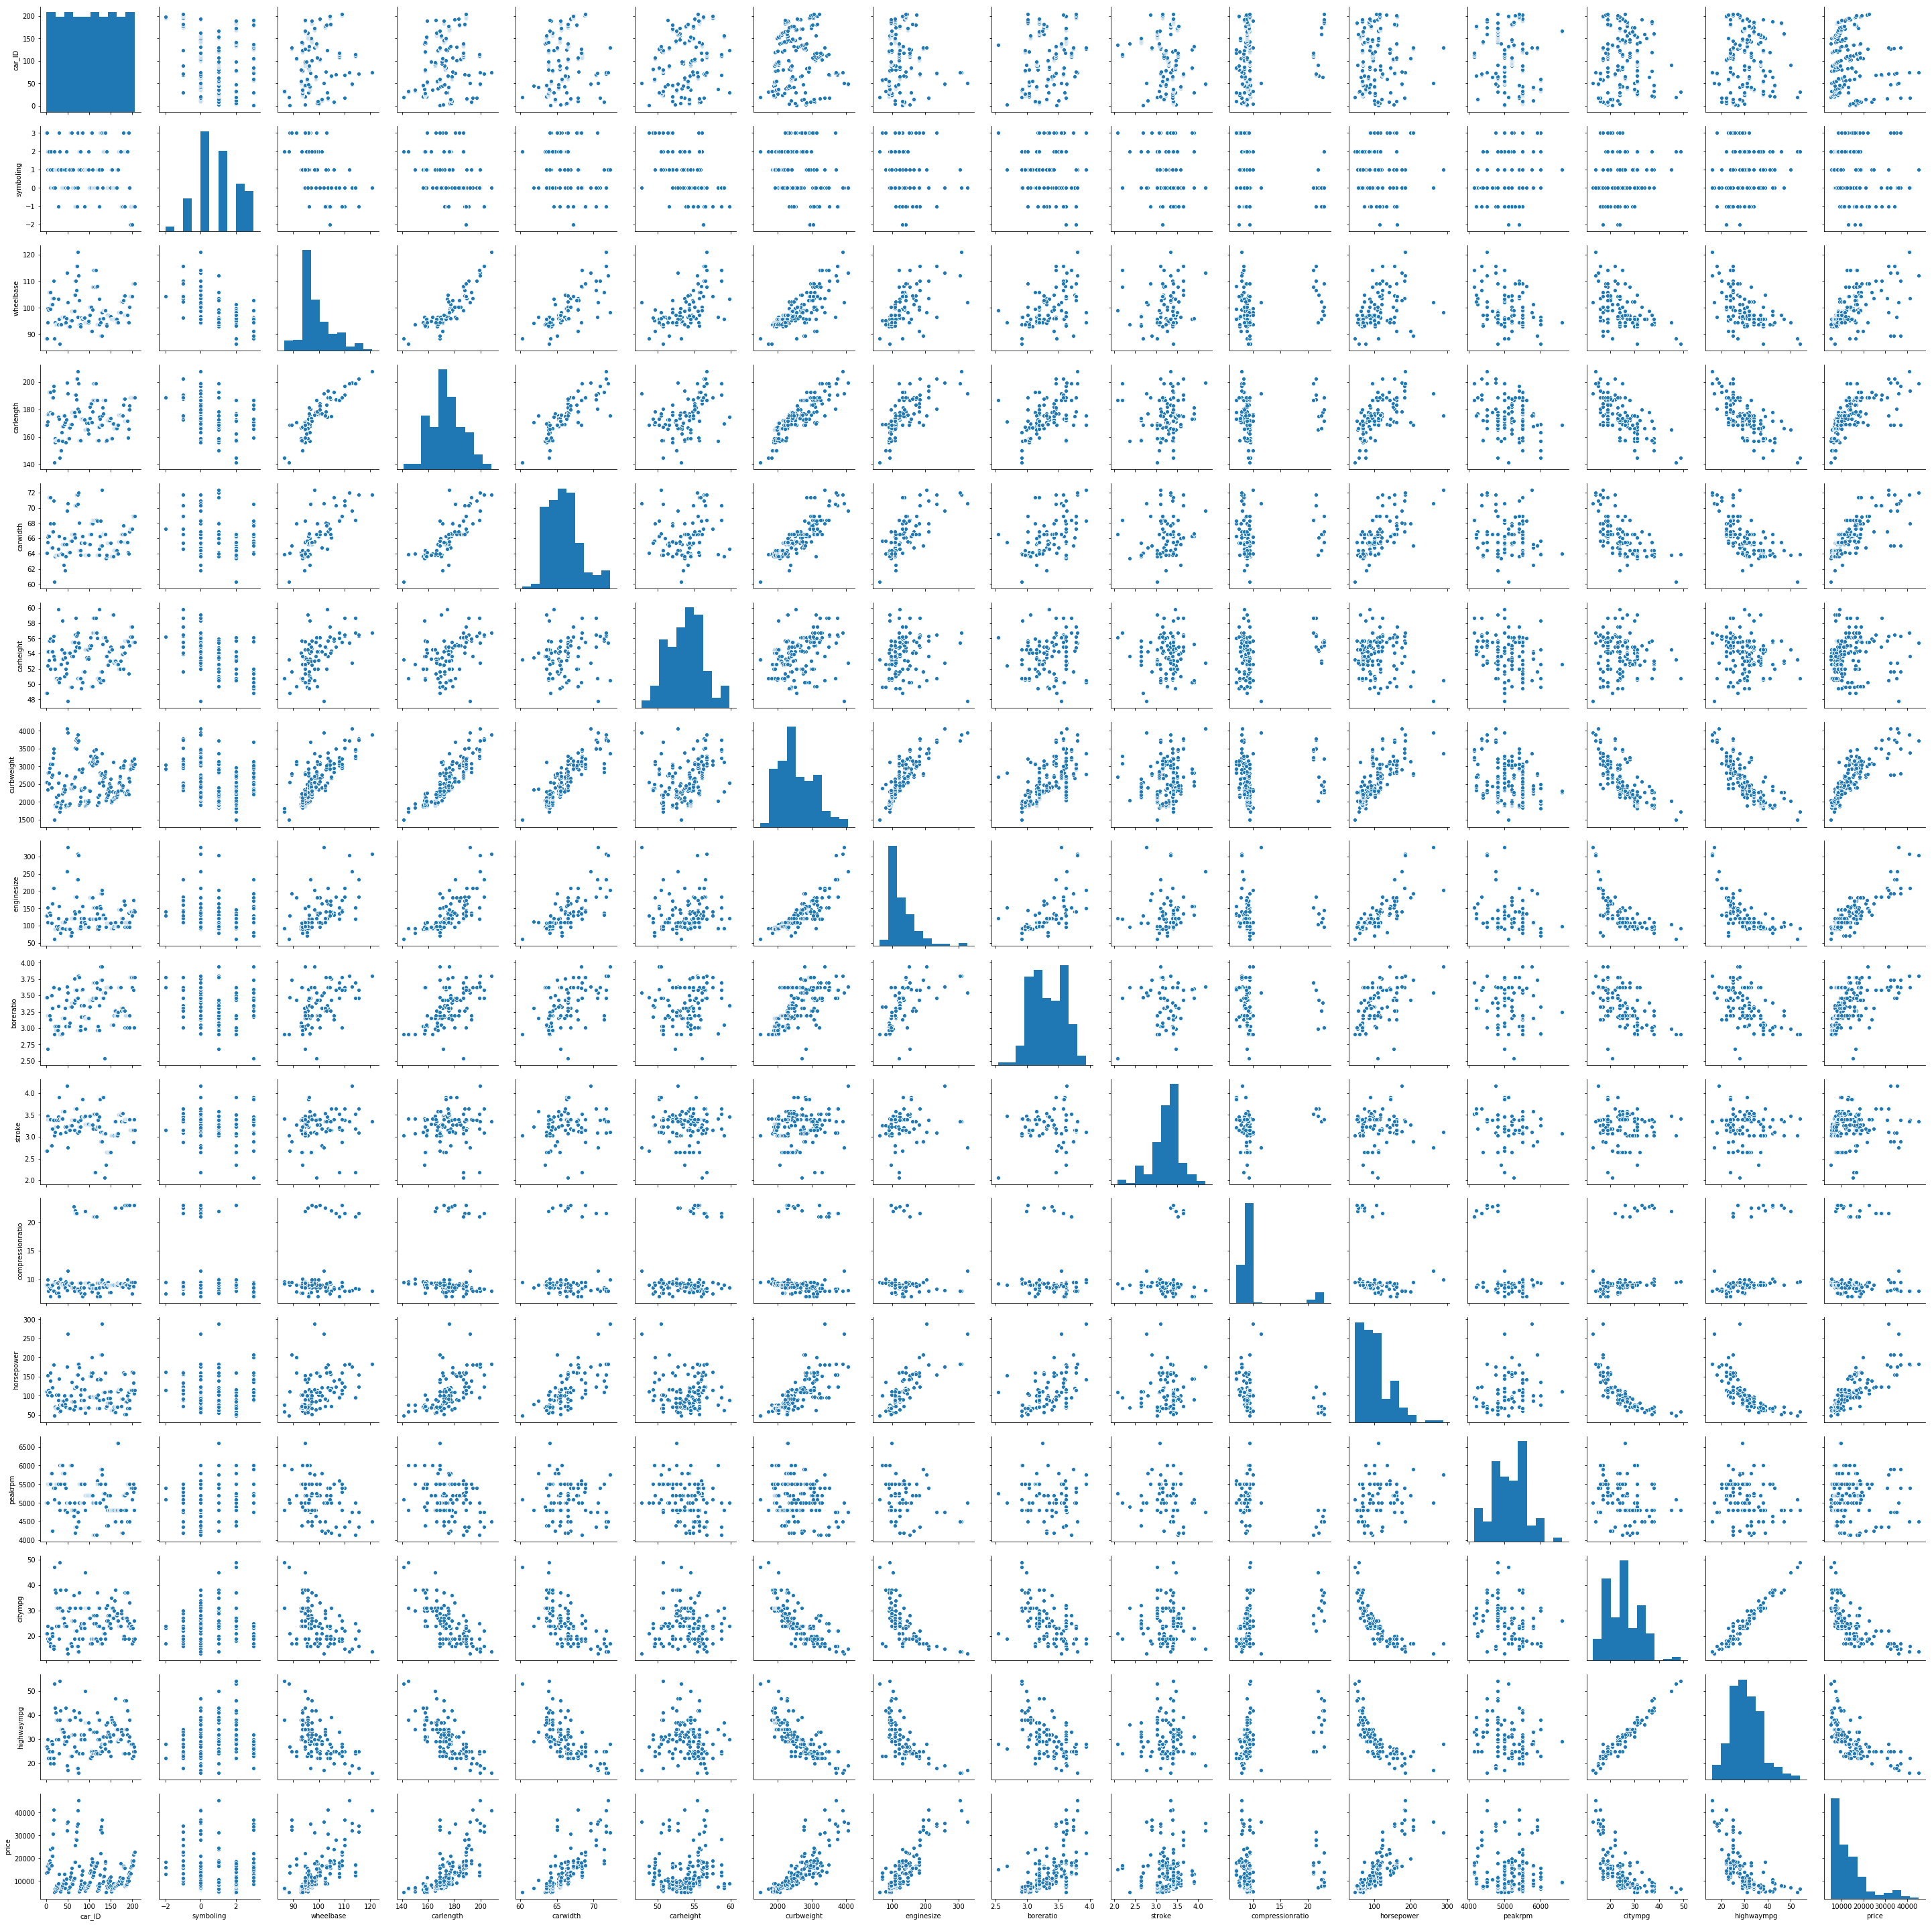

In [17]:
# Using pairplot to check the relations

sns.pairplot(car)
plt.show()


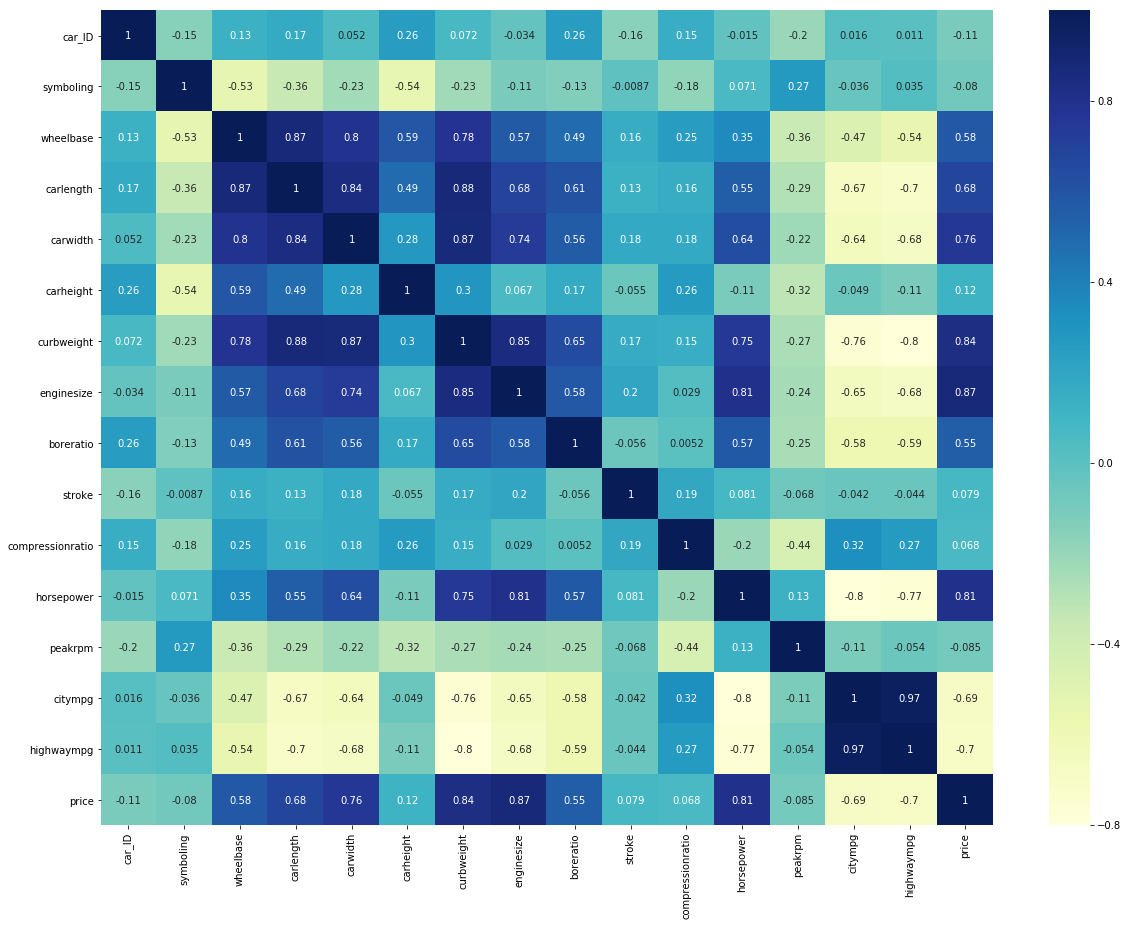

In [18]:
# Using heat map to check the relations

plt.figure(figsize=(20, 15))
sns.heatmap(car.corr(), cmap="YlGnBu", annot = True)
plt.show()


- #### Visualising Categorical Variables



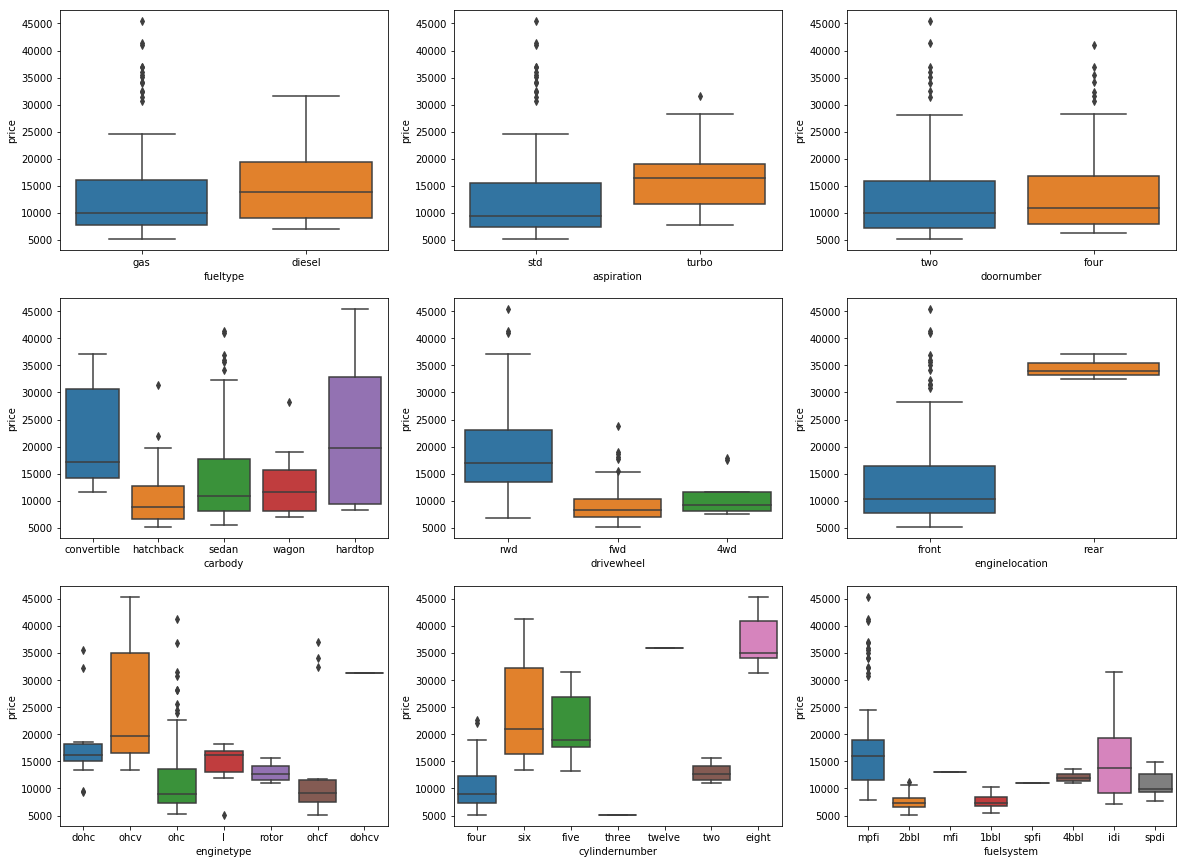

In [19]:
# Using box plot to check the relation

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()


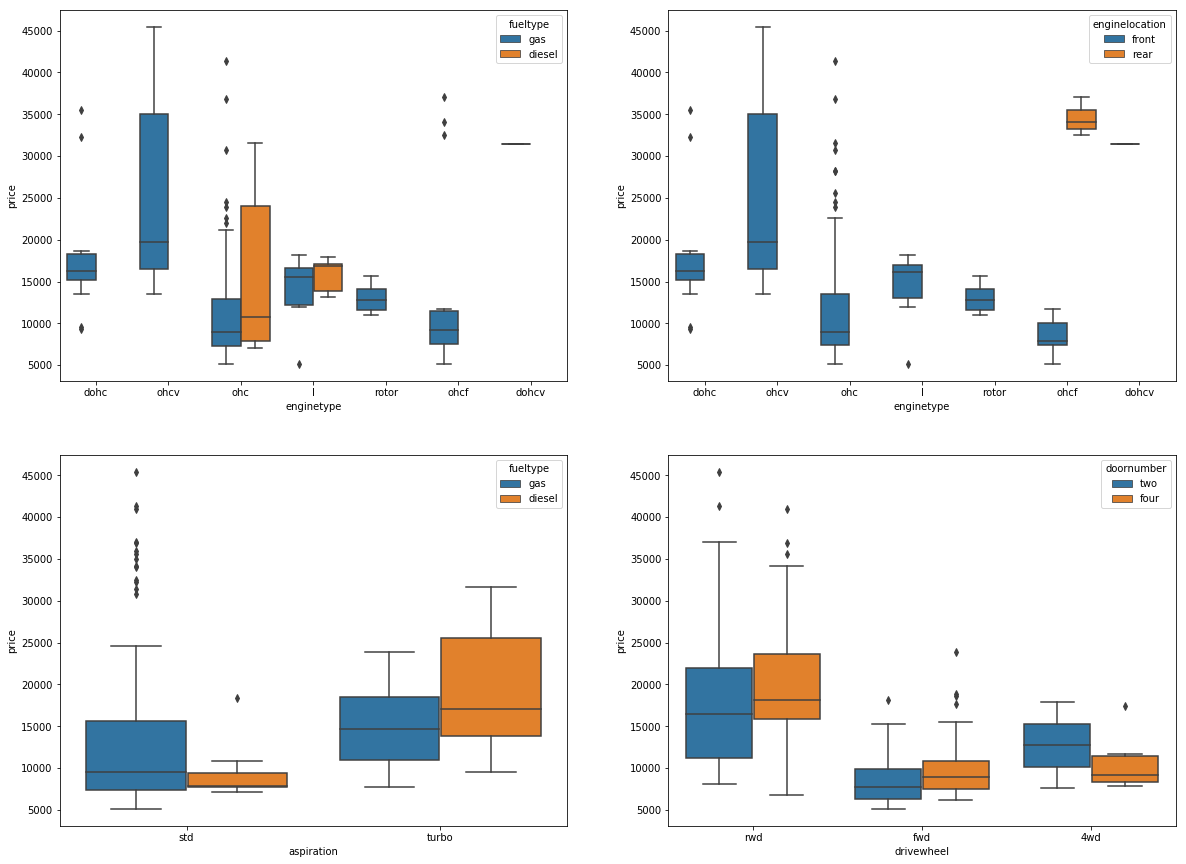

In [20]:
# Using box plot to check the relation

plt.figure(figsize = (20, 15))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = car)
plt.subplot(2,2,2)
sns.boxplot(x = 'enginetype', y = 'price', hue = 'enginelocation', data = car)
plt.subplot(2,2,3)
sns.boxplot(x = 'aspiration', y = 'price', hue = 'fueltype', data = car)
plt.subplot(2,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', hue = 'doornumber', data = car)
plt.show()


- ### Data Preparation for Modelling

In [21]:
# Creating copy of dataframe 

car_df = car.copy()
car_df.head(5)


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car Company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [22]:
# Checking the information of dataframe

car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [23]:
# Using pandas feature to replace number with digit

clean_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

car_df.replace(clean_nums, inplace=True)
car_df.head(5)


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car Company
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [24]:
# Using 'map' function on 'fueltype','aspiration','enginelocation' column of dataframe

car_df['fueltype'] = car_df['fueltype'].map({"gas": 1, "diesel": 0})
car_df['aspiration'] = car_df['aspiration'].map({"std": 1, "turbo": 0})
car_df['enginelocation'] = car_df['enginelocation'].map({"front": 1, "rear": 0})
car_df.head(5)


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car Company
0,1,3,1,1,2,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,1,1,2,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,1,1,2,hatchback,rwd,1,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,1,1,4,sedan,fwd,1,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,1,1,4,sedan,4wd,1,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [25]:
# To check the stats of dataframe after making the changes

car_df.describe()


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.902439,0.819512,3.121951,0.985366,98.756585,174.049268,65.907805,53.724878,...,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.297446,0.385535,0.994966,0.120377,6.021776,12.337289,2.145204,2.443522,...,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,...,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,1.000000,1.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,...,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,97.000000,173.200000,65.500000,54.100000,...,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,1.000000,1.000000,4.000000,1.000000,102.400000,183.100000,66.900000,55.500000,...,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,1.000000,1.000000,4.000000,1.000000,120.900000,208.100000,72.300000,59.800000,...,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [26]:
# Getting the dummy variable to convert the categoraical value into nuerical for modelling

car_df_1 = pd.get_dummies(car_df, columns=["carbody", "drivewheel","enginetype","fuelsystem","Car Company"], 
               prefix=["body", "wheel","type","fuel","Company"])
car_df_1.head(5)


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porcshce,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


- ###  Splitting the Data into Training and Testing Sets



In [27]:
# Using train_test_split to create test and train data set

np.random.seed(0)
df_train, df_test = train_test_split(car_df_1, train_size = 0.7, test_size = 0.3, random_state = 100)


In [28]:
# Using scaler() function to all the numeric columns except the one which are already converted to brinary numeric

scaler = MinMaxScaler()
num_vars = ['car_ID','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight',
            'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
            'peakrpm','citympg','highwaympg','price','doornumber','cylindernumber']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
# Checkig the train dataframe

df_train.head(5)


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porcshce,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
122,0.598039,0.6,1,1,1.0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,1,0,0,0,0,0,0,0
125,0.612745,1.0,1,1,0.0,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,1,0,0,0,0,0,0
166,0.813725,0.6,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,0.004902,1.0,1,1,0.0,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,0.975490,0.2,1,0,1.0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Getting stats info of train dataframe

df_train.describe()


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porcshce,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.478061,0.559441,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.289106,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232843,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.470588,0.600000,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.718137,0.600000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


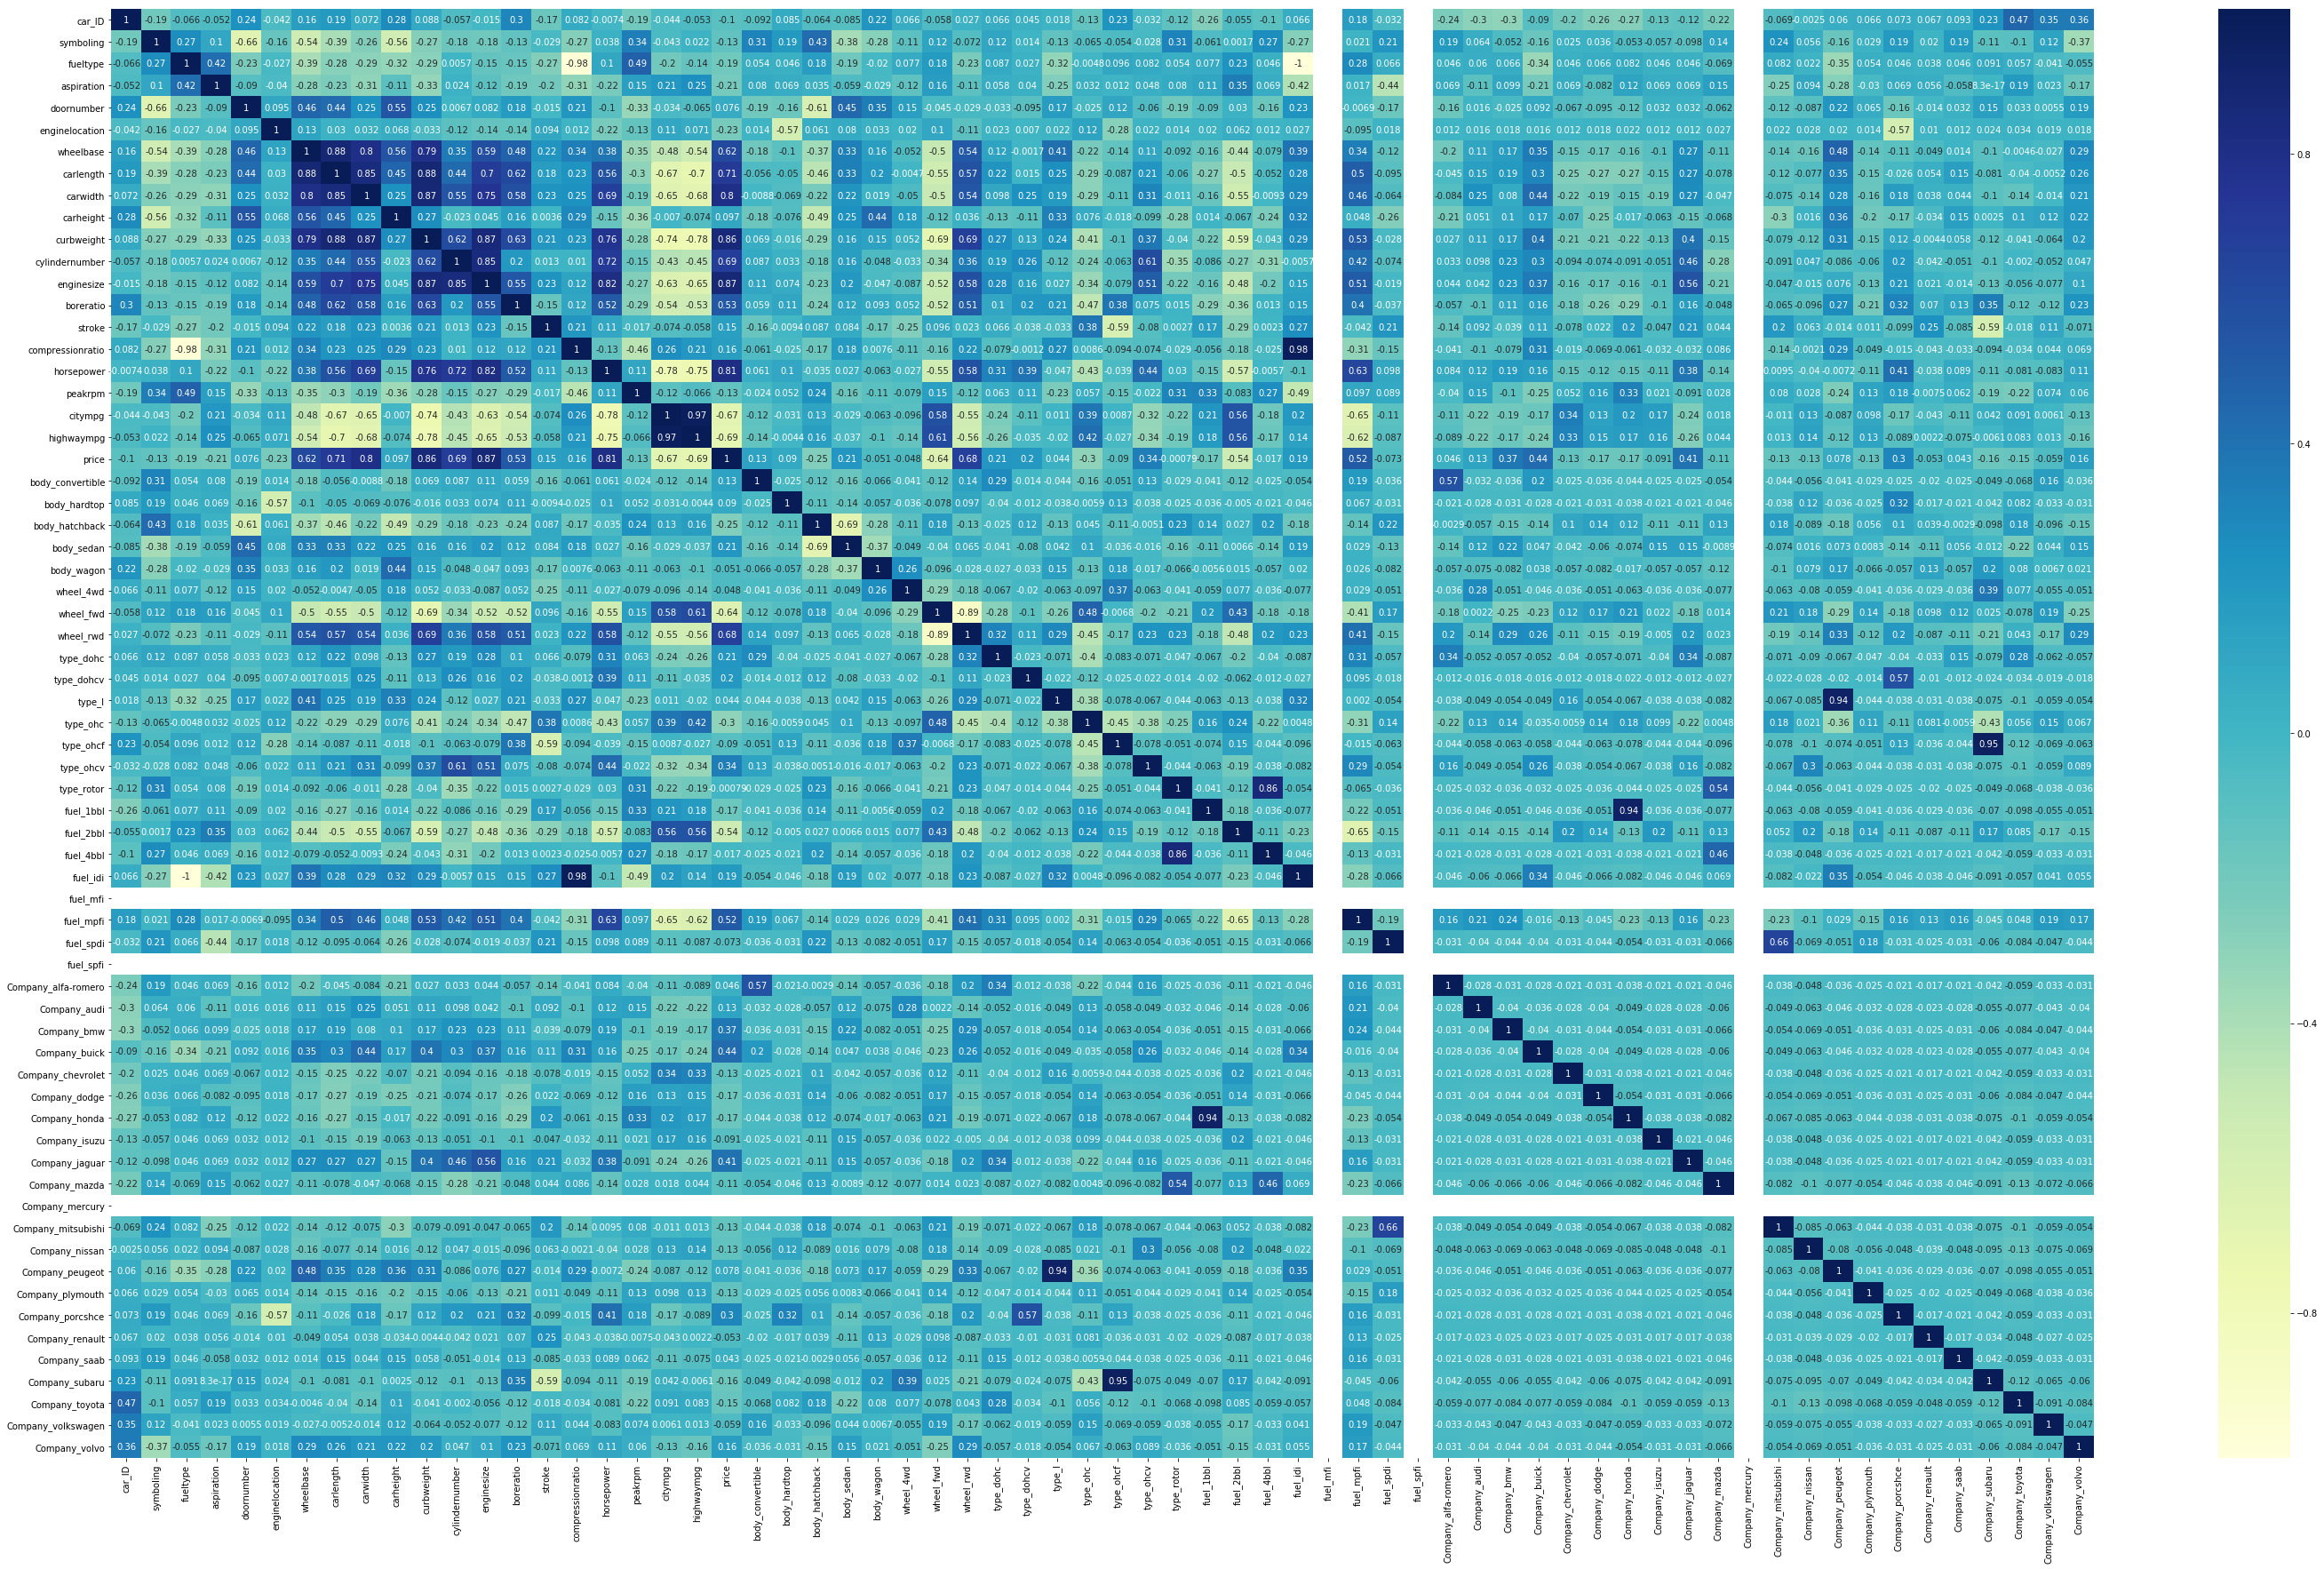

In [31]:
# Checking the correlation coefficients to see which variables are highly correlated using heatmap

plt.figure(figsize = (50, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


As you might have noticed, enginesize seems to the correlated to price the most. Let's see a pairplot for enginesize vs price.

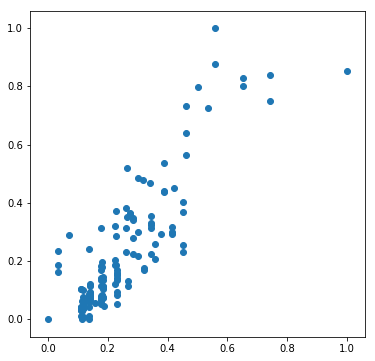

In [32]:
# Pairplot to check the relation between enginesize and price

plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()


In [33]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('price')
X_train = df_train


- ### Building a linear model

In [34]:
# Adding a constant and creating fitted model

X_train_lm = sm.add_constant(X_train[['enginesize']])

lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

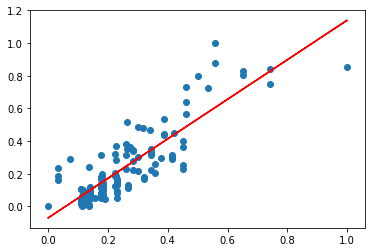

In [35]:
# Visualising the data with a scatter plot and the fitted regression line

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.07 + 1.21*X_train_lm.iloc[:, 1], 'r')
plt.show()


In [36]:
# Print a summary of the linear regression model obtained

print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.09e-44
Time:                        23:33:50   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

- ### Adding another variable

The R-squared value obtained is `0.753`. Since we have so many variables, using all highly correlated variable, i.e. having correlation more than 10%.

In [37]:
# Assign all the feature variables to X

X_train_lm = X_train[['enginesize', 'curbweight','horsepower','carlength','carwidth','cylindernumber',
                      'wheelbase','boreratio','wheel_rwd','fuel_mpfi','fuel_idi','Company_buick','Company_jaguar',
                     'Company_porcshce','Company_bmw','Company_audi','type_ohcv','type_dohc','type_dohcv','body_sedan',
                      'stroke','compressionratio','body_convertible']]


In [38]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params


const               0.100894
enginesize          0.892649
curbweight          0.131229
horsepower          0.545888
carlength          -0.005061
carwidth            0.176763
cylindernumber     -0.823312
wheelbase           0.088257
boreratio          -0.295925
wheel_rwd           0.005643
fuel_mpfi          -0.004015
fuel_idi           -0.215981
Company_buick       0.202822
Company_jaguar      0.150290
Company_porcshce    0.254240
Company_bmw         0.255282
Company_audi        0.071479
type_ohcv          -0.042523
type_dohc          -0.056251
type_dohcv         -0.126879
body_sedan          0.018061
stroke             -0.226282
compressionratio    0.328691
body_convertible    0.126432
dtype: float64

In [39]:
# Checking the summary to get insights

print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     85.67
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.59e-63
Time:                        23:34:09   Log-Likelihood:                 221.84
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     119   BIC:                            -324.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1009      0.076  

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [40]:
# Create a dataframe that will contain the names of  variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,260.51
1,enginesize,83.05
11,fuel_idi,73.42
22,compressionratio,68.84
6,cylindernumber,33.11
2,curbweight,23.86
4,carlength,13.12
3,horsepower,12.22
8,boreratio,12.04
7,wheelbase,10.80


### Dropping the variable and updating the model

In [41]:
# Dropping highly correlated variables and insignificant variables

X = X_train_lm.drop('carlength', 1,)


In [42]:
# Build more fitted model

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()


In [43]:
# Print the summary of the model

print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     90.32
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.78e-64
Time:                        23:34:26   Log-Likelihood:                 221.83
No. Observations:                 143   AIC:                            -397.7
Df Residuals:                     120   BIC:                            -329.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1014      0.075  

In [44]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,257.55
1,enginesize,82.90
10,fuel_idi,67.30
21,compressionratio,64.00
5,cylindernumber,33.08
2,curbweight,17.75
3,horsepower,12.15
7,boreratio,11.68
4,carwidth,10.26
6,wheelbase,9.74


In [45]:
# Dropping a varibale 

X = X_train_lm.drop('fuel_idi', 1,)


In [46]:
# Building more fitted model

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()


In [47]:
# Print the summary of the model

print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     93.30
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.70e-64
Time:                        23:34:50   Log-Likelihood:                 220.33
No. Observations:                 143   AIC:                            -396.7
Df Residuals:                     121   BIC:                            -331.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1332      0.073  

In [48]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,239.48
1,enginesize,81.98
5,cylindernumber,31.71
2,curbweight,16.85
7,boreratio,11.66
3,horsepower,11.37
4,carwidth,9.42
6,wheelbase,9.38
19,stroke,5.71
15,type_ohcv,3.51


In [49]:
# Droping another variable

X = X_train_lm.drop('fuel_mpfi', 1,)


In [50]:
# Building more fitted model

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()


In [51]:
# Print the summary of the model

print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     98.77
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.69e-65
Time:                        23:35:12   Log-Likelihood:                 220.33
No. Observations:                 143   AIC:                            -398.7
Df Residuals:                     122   BIC:                            -336.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1333      0.072  

In [52]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,233.42
1,enginesize,80.44
5,cylindernumber,31.26
2,curbweight,16.85
7,boreratio,11.34
3,horsepower,10.78
4,carwidth,9.41
6,wheelbase,8.88
18,stroke,5.63
14,type_ohcv,3.40


In [53]:
# Droping another variable

X = X_train_lm.drop('enginesize', 1,)


In [54]:
# Build more fitted model

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()


In [55]:
# Print the summary of the model

print(lr_5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     96.69
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.66e-64
Time:                        23:35:38   Log-Likelihood:                 214.90
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     123   BIC:                            -330.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0637      0.034  

In [56]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,50.29
1,curbweight,15.34
2,horsepower,10.62
3,carwidth,9.34
5,wheelbase,8.83
4,cylindernumber,5.53
6,boreratio,3.32
13,type_ohcv,3.12
7,wheel_rwd,3.08
10,Company_porcshce,2.32


In [57]:
# Dropping another variable

X = X_train_lm.drop('curbweight', 1,)


In [58]:
# Building more fitted model

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()


In [59]:
# Print the summary of the model

print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     99.49
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.12e-64
Time:                        23:36:03   Log-Likelihood:                 212.65
No. Observations:                 143   AIC:                            -387.3
Df Residuals:                     124   BIC:                            -331.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0763      0.034  

In [60]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,48.56
2,carwidth,9.27
1,horsepower,8.23
4,wheelbase,6.28
3,cylindernumber,5.51
12,type_ohcv,3.07
6,wheel_rwd,3.03
5,boreratio,2.97
9,Company_porcshce,2.30
13,type_dohc,2.02


In [61]:
# Dropping another variable

X = X_train_lm.drop('cylindernumber', 1,)


In [62]:
# Building more fitted model

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()


In [63]:
# Print the summary of the model

print(lr_7.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.70e-65
Time:                        23:36:45   Log-Likelihood:                 212.11
No. Observations:                 143   AIC:                            -388.2
Df Residuals:                     125   BIC:                            -334.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0982      0.026  

In [64]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,27.36
2,carwidth,9.27
1,horsepower,6.88
3,wheelbase,6.03
5,wheel_rwd,2.72
4,boreratio,2.56
11,type_ohcv,2.24
8,Company_porcshce,2.20
12,type_dohc,1.97
13,type_dohcv,1.82


In [65]:
# Dropping another variable

X = X_train_lm.drop('carwidth', 1,)


In [66]:
# Building more fitted model

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()


In [67]:
# Print the summary of the model

print(lr_8.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.72e-65
Time:                        23:37:01   Log-Likelihood:                 208.49
No. Observations:                 143   AIC:                            -383.0
Df Residuals:                     126   BIC:                            -332.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0905      0.026  

In [68]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,26.99
1,horsepower,5.52
2,wheelbase,3.01
4,wheel_rwd,2.67
3,boreratio,2.41
10,type_ohcv,2.21
7,Company_porcshce,2.18
11,type_dohc,1.91
12,type_dohcv,1.79
15,compressionratio,1.59


In [69]:
# Dropping another variable

X = X_train_lm.drop('horsepower', 1,)


In [70]:
# Building more fitted model

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()


In [71]:
# Print the summary of the model

print(lr_9.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     62.73
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.41e-51
Time:                        23:37:21   Log-Likelihood:                 169.20
No. Observations:                 143   AIC:                            -306.4
Df Residuals:                     127   BIC:                            -259.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1114      0.034  

In [72]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,26.80
1,wheelbase,3.01
3,wheel_rwd,2.49
2,boreratio,1.97
6,Company_porcshce,1.96
10,type_dohc,1.58
11,type_dohcv,1.51
4,Company_buick,1.49
15,body_convertible,1.46
14,compressionratio,1.43


In [73]:
# Droping another variable

X = X_train_lm.drop('body_sedan', 1,)


In [74]:
# Build a third fitted model

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()


In [75]:
# Print the summary of the model

print(lr_10.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     67.69
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.23e-52
Time:                        23:37:34   Log-Likelihood:                 169.15
No. Observations:                 143   AIC:                            -308.3
Df Residuals:                     128   BIC:                            -263.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1106      0.034  

In [76]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,26.64
1,wheelbase,2.92
3,wheel_rwd,2.45
2,boreratio,1.96
6,Company_porcshce,1.95
10,type_dohc,1.58
11,type_dohcv,1.51
4,Company_buick,1.49
14,body_convertible,1.46
13,compressionratio,1.39


In [77]:
# Droping another variable

X = X_train_lm.drop('type_dohcv', 1,)


In [78]:
# Building more fitted model

X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()


In [79]:
# Print the summary of the model

print(lr_11.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     73.45
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.91e-53
Time:                        23:37:50   Log-Likelihood:                 169.13
No. Observations:                 143   AIC:                            -310.3
Df Residuals:                     129   BIC:                            -268.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1110      0.034  

In [80]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,26.56
1,wheelbase,2.89
3,wheel_rwd,2.44
2,boreratio,1.96
10,type_dohc,1.58
4,Company_buick,1.49
13,body_convertible,1.45
6,Company_porcshce,1.40
12,compressionratio,1.39
5,Company_jaguar,1.36


In [82]:
# Dropping another variable

X = X_train_lm.drop('compressionratio', 1,)


In [83]:
# Build a third fitted model

X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()


In [84]:
# Print the summary of the model

print(lr_12.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     79.97
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.22e-54
Time:                        23:38:47   Log-Likelihood:                 168.96
No. Observations:                 143   AIC:                            -311.9
Df Residuals:                     130   BIC:                            -273.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1110      0.034  

In [85]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,26.56
1,wheelbase,2.77
3,wheel_rwd,2.38
2,boreratio,1.95
10,type_dohc,1.53
12,body_convertible,1.45
4,Company_buick,1.44
6,Company_porcshce,1.40
5,Company_jaguar,1.35
9,type_ohcv,1.27


In [86]:
# Droping another variable

X = X_train_lm.drop('stroke', 1,)


In [87]:
# Build more fitted model

X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()


In [88]:
# Print the summary of the model

print(lr_13.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     83.09
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.61e-53
Time:                        23:39:02   Log-Likelihood:                 165.42
No. Observations:                 143   AIC:                            -306.8
Df Residuals:                     131   BIC:                            -271.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0429      0.021  

In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,9.98
1,wheelbase,2.66
3,wheel_rwd,2.38
2,boreratio,1.80
10,type_dohc,1.53
11,body_convertible,1.44
4,Company_buick,1.43
6,Company_porcshce,1.40
5,Company_jaguar,1.30
9,type_ohcv,1.25


In [90]:
# Droping another variable

X = X_train_lm.drop('type_dohc', 1,)


In [91]:
# Build more fitted model

X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()


In [92]:
# Print the summary of the model

print(lr_14.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     89.70
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.35e-54
Time:                        23:39:27   Log-Likelihood:                 163.78
No. Observations:                 143   AIC:                            -305.6
Df Residuals:                     132   BIC:                            -273.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0400      0.021  

In [93]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,9.91
1,wheelbase,2.66
3,wheel_rwd,2.13
2,boreratio,1.78
4,Company_buick,1.39
6,Company_porcshce,1.38
10,body_convertible,1.31
9,type_ohcv,1.17
5,Company_jaguar,1.15
7,Company_bmw,1.15


In [94]:
# Droping another variable

X = X_train_lm.drop('boreratio', 1,)


In [95]:
# Build more fitted model

X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()


In [96]:
# Print the summary of the model

print(lr_15.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     96.86
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.64e-54
Time:                        23:39:44   Log-Likelihood:                 161.53
No. Observations:                 143   AIC:                            -303.1
Df Residuals:                     133   BIC:                            -273.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0171      0.018  

In [97]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,7.15
1,wheelbase,2.19
2,wheel_rwd,2.09
3,Company_buick,1.38
9,body_convertible,1.27
5,Company_porcshce,1.17
8,type_ohcv,1.17
4,Company_jaguar,1.15
6,Company_bmw,1.15
7,Company_audi,1.10


## Residual Analysis of the train data

In [98]:
# Creating train set

y_train_price = lr_15.predict(X_train_lm)


Text(0.5, 0, 'Errors')

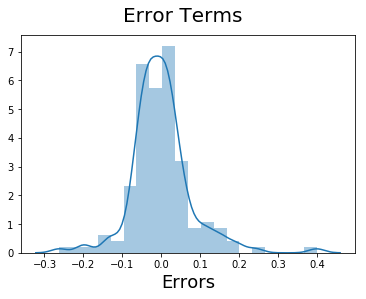

In [99]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


## Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [100]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['car_ID','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight',
            'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
            'peakrpm','citympg','highwaympg','price','doornumber','cylindernumber']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [101]:
# To check the stats of test dataframe

df_test.describe()


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porcshce,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.552134,0.583871,0.887097,0.822581,0.564516,0.967742,0.370121,0.486741,0.375212,0.454249,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.299499,0.271724,0.319058,0.385142,0.499868,0.178127,0.179970,0.183964,0.208977,0.234487,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318182,0.400000,1.000000,1.000000,0.000000,1.000000,0.265306,0.389764,0.221053,0.264423,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.573232,0.600000,1.000000,1.000000,1.000000,1.000000,0.327988,0.475591,0.326316,0.485577,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.825758,0.800000,1.000000,1.000000,1.000000,1.000000,0.482507,0.642126,0.421053,0.605769,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [102]:
# Diving into test dataset

y_test = df_test.pop('price')
X_test = df_test


In [103]:
# Adding constant variable to test dataframe

X_test_m4 = sm.add_constant(X_test[['enginesize', 'curbweight','horsepower','carlength','carwidth','cylindernumber',
                      'wheelbase','boreratio','wheel_rwd','fuel_mpfi','fuel_idi','Company_buick','Company_jaguar',
                     'Company_porcshce','Company_bmw','Company_audi','type_ohcv','type_dohc','type_dohcv','body_sedan',
                      'stroke','compressionratio','body_convertible']])


In [105]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['enginesize','curbweight','carlength', 'carwidth','curbweight','boreratio',
                            'enginesize','stroke','compressionratio','horsepower','cylindernumber','fuel_mpfi',
                           'fuel_idi','type_dohcv','body_sedan','stroke','compressionratio','type_dohc'], axis = 1)


In [106]:
# Making predictions using the fourth model

y_pred_m4 = lr_15.predict(X_test_m4)


## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

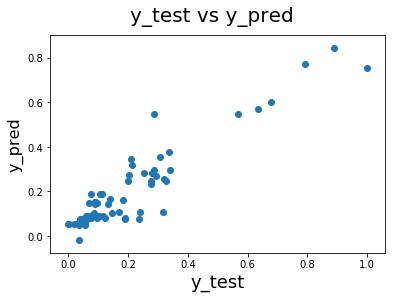

In [107]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


In [110]:
# calculate the R-squared score on the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.8605159647325236